In [1]:
# This workbook will review the Economic data from Zilow to preditc Housing Prices in Phoenix Metro Area
# Files to be reviewed: 1. ZIP time series -Table and 2. County cross walk

# Cities time series - Table, 2. County timeseries - Table, 3. Cities crosswalk - Dictionary, 
# 4. County cross walk - Dictionary, 5. Metro Time series - Table, 6. Neighborhood time series - Table, 
# 7. Region Name series - Table (State), 8. ZIP time series -Table

# ZILLOW home value data and for sale listing inventory metrics needed 

#Importing modules needed 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing Zillow data for Cities time series

zillow_data_raw = pd.read_csv('C:/Users/EdwinPalomo/Desktop/DataScience/Capstone_2/County_time_series.csv', parse_dates=True)

# index_col=False in case remove indexes

In [3]:
# 1st glance of data
zillow_data_raw.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65600.0,NaN,85700.0,86000.0,129700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81900.0,NaN,116800.0,116900.0,181400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70600.0,NaN,110600.0,106800.0,192300.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,70000.0,70000.0,123500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# high overview of all data

zillow_data_raw.shape
zillow_data_raw.select_dtypes(include ='number')


,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65600.0,NaN,85700.0,86000.0,129700.0,NaN,NaN,NaN,NaN,NaN
1,10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81900.0,NaN,116800.0,116900.0,181400.0,NaN,NaN,NaN,NaN,NaN
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70600.0,NaN,110600.0,106800.0,192300.0,NaN,NaN,NaN,NaN,NaN
3,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,70000.0,70000.0,123500.0,NaN,NaN,NaN,NaN,NaN
4,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518786,9007,NaN,1233.0,1128.0,NaN,150.265252,162.745814,152.768512,142.396246,158.093023,...,172500.0,142900.0,259700.0,272400.0,381000.0,1620.0,1583.0,1.070,1302.0,1660.0
518787,9009,NaN,4153.0,3710.0,145.474138,142.480588,155.308393,153.251934,108.097484,154.824106,...,131700.0,132700.0,220000.0,238800.0,360200.0,1669.0,1593.0,1.154,1294.0,1729.0
518788,9011,NaN,1651.0,1514.0,143.055556,137.813212,149.931507,138.903723,102.903196,147.057532,...,157100.0,137700.0,224400.0,231500.0,361100.0,1566.0,1521.0,1.078,1150.0,1591.0
518789,9013,NaN,736.0,655.0,NaN,140.014368,150.625992,136.361382,98.393826,142.613597,...,157500.0,118700.0,220000.0,226400.0,327100.0,1709.0,1668.0,1.082,1311.0,1755.0


In [5]:
# checking 'Date' column actually is date format
zillow_data_raw.select_dtypes(include ='datetime')


""
0
1
2
3
4
...
518786
518787
518788
518789


In [6]:
# checking which columns are numeric values
zillow_data_raw.select_dtypes(include ='number')


,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65600.0,NaN,85700.0,86000.0,129700.0,NaN,NaN,NaN,NaN,NaN
1,10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81900.0,NaN,116800.0,116900.0,181400.0,NaN,NaN,NaN,NaN,NaN
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70600.0,NaN,110600.0,106800.0,192300.0,NaN,NaN,NaN,NaN,NaN
3,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,70000.0,70000.0,123500.0,NaN,NaN,NaN,NaN,NaN
4,1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518786,9007,NaN,1233.0,1128.0,NaN,150.265252,162.745814,152.768512,142.396246,158.093023,...,172500.0,142900.0,259700.0,272400.0,381000.0,1620.0,1583.0,1.070,1302.0,1660.0
518787,9009,NaN,4153.0,3710.0,145.474138,142.480588,155.308393,153.251934,108.097484,154.824106,...,131700.0,132700.0,220000.0,238800.0,360200.0,1669.0,1593.0,1.154,1294.0,1729.0
518788,9011,NaN,1651.0,1514.0,143.055556,137.813212,149.931507,138.903723,102.903196,147.057532,...,157100.0,137700.0,224400.0,231500.0,361100.0,1566.0,1521.0,1.078,1150.0,1591.0
518789,9013,NaN,736.0,655.0,NaN,140.014368,150.625992,136.361382,98.393826,142.613597,...,157500.0,118700.0,220000.0,226400.0,327100.0,1709.0,1668.0,1.082,1311.0,1755.0


In [7]:
# updating 'Date' column to date format
zillow_data_raw.Date = pd.to_datetime(zillow_data_raw.Date)
zillow_data_raw.select_dtypes(include ='datetime')



,Date
0,1996-04-30
1,1996-04-30
2,1996-04-30
3,1996-04-30
4,1996-04-30
...,...
518786,2017-12-31
518787,2017-12-31
518788,2017-12-31
518789,2017-12-31


In [8]:
# last 2 characthers of column 'RegionName' are the state name, so we are creating a new 'State' column
# and we are removing the these characters from the 'RegionName'

#zillow_data_raw['State'] = zillow_data_raw['RegionName'].str[-2:].str.upper()
#zillow_data_raw['RegionName'] = zillow_data_raw['RegionName'].str[:-2]
#zillow_data_raw.head(3)

In [9]:
#checking missing values for all the data set

missing_values = pd.concat([zillow_data_raw.isnull().sum(), 100*zillow_data_raw.isnull().mean()], axis =1)
missing_values.columns = ['count', '%']
all_missing = missing_values.sort_values(by=['%'], ascending=False)
all_missing

,count,%
PctOfHomesSellingForLoss_AllHomes,518188,99.883768
PctOfHomesSellingForGain_AllHomes,518188,99.883768
MedianRentalPrice_5BedroomOrMore,516253,99.510786
MedianRentalPricePerSqft_5BedroomOrMore,515972,99.456621
MedianRentalPricePerSqft_DuplexTriplex,512930,98.870258
...,...,...
ZHVI_MiddleTier,137974,26.595296
ZHVI_AllHomes,137950,26.590669
ZHVI_TopTier,126411,24.366460
RegionName,0,0.000000


In [10]:
# There are a lot of columns and missing values, so we are going to identify the columsn that we are going to use and 
# fill them with median values grouping data per 'RegionName' and 'Year' to get a more accurate calculation 

zillow_data_raw['Year'] = zillow_data_raw.Date.dt.year

zillow_data_raw.columns

Index(['Date', 'RegionName', 'DaysOnZillow_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_CondoCoop',
       'Median

In [11]:
# creating new variable with single family data only

single_famiy_data = zillow_data_raw[['Date', 'RegionName', 'DaysOnZillow_AllHomes',
       'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianPctOfPriceReduction_AllHomes',
       'MedianPctOfPriceReduction_SingleFamilyResidence',
       'PctOfHomesDecreasingInValues_AllHomes',
       'PctOfHomesIncreasingInValues_AllHomes',
       'PctOfHomesSellingForGain_AllHomes',
       'PctOfHomesSellingForLoss_AllHomes',
       'PctOfListingsWithPriceReductions_AllHomes',
       'PctOfListingsWithPriceReductions_SingleFamilyResidence',
       'PriceToRentRatio_AllHomes', 'Sale_Counts', 'Year']]

In [12]:
#checking missing values for single family data

missing_values = pd.concat([single_famiy_data.isnull().sum(), 100*single_famiy_data.isnull().mean()], axis =1)
missing_values.columns = ['count', '%']
all_missing = missing_values.sort_values(by=['%'], ascending=False)
all_missing

,count,%
PctOfHomesSellingForLoss_AllHomes,518188,99.883768
PctOfHomesSellingForGain_AllHomes,518188,99.883768
MedianListingPrice_1Bedroom,510919,98.482626
MedianListingPricePerSqft_1Bedroom,509359,98.181927
MedianListingPrice_5BedroomOrMore,491304,94.701720
MedianListingPricePerSqft_5BedroomOrMore,484022,93.298072
DaysOnZillow_AllHomes,475099,91.578111
Sale_Counts,469946,90.584841
MedianListingPrice_2Bedroom,464826,89.597931
MedianListingPricePerSqft_2Bedroom,452098,87.144534


In [13]:
# Filling missing values with median information 
# try grouping by 'RegionName' tomorrow

# Sample to group by: titanic['age'].fillna(titanic.groupby(['pclass', 'sex'])['age'].transform('mean'))

single_famiy_data['PctOfHomesIncreasingInValues_AllHomes'].fillna(value=single_famiy_data['PctOfHomesIncreasingInValues_AllHomes'].median(), inplace=True)
single_famiy_data['PctOfHomesDecreasingInValues_AllHomes'].fillna(value=single_famiy_data['PctOfHomesDecreasingInValues_AllHomes'].median(), inplace=True)
single_famiy_data['MedianListingPricePerSqft_AllHomes'].fillna(value=single_famiy_data['MedianListingPricePerSqft_AllHomes'].median(), inplace=True)
single_famiy_data['InventoryRaw_AllHomes'].fillna(value=single_famiy_data['InventoryRaw_AllHomes'].median(), inplace=True)
single_famiy_data['MedianListingPrice_AllHomes'].fillna(value=single_famiy_data['MedianListingPrice_AllHomes'].median(), inplace=True)
single_famiy_data['PctOfListingsWithPriceReductions_AllHomes'].fillna(value=single_famiy_data['PctOfListingsWithPriceReductions_AllHomes'].median(), inplace=True)
single_famiy_data['PctOfListingsWithPriceReductions_SingleFamilyResidence'].fillna(value=single_famiy_data['PctOfListingsWithPriceReductions_SingleFamilyResidence'].median(), inplace=True)
single_famiy_data['MedianPctOfPriceReduction_AllHomes'].fillna(value=single_famiy_data['MedianPctOfPriceReduction_AllHomes'].median(), inplace=True)
single_famiy_data['MedianListingPricePerSqft_3Bedroom'].fillna(value=single_famiy_data['MedianListingPricePerSqft_3Bedroom'].median(), inplace=True)
single_famiy_data['MedianPctOfPriceReduction_SingleFamilyResidence'].fillna(value=single_famiy_data['MedianPctOfPriceReduction_SingleFamilyResidence'].median(), inplace=True)
single_famiy_data['PriceToRentRatio_AllHomes'].fillna(value=single_famiy_data['PriceToRentRatio_AllHomes'].median(), inplace=True)
single_famiy_data['MedianListingPrice_3Bedroom'].fillna(value=single_famiy_data['MedianListingPrice_3Bedroom'].median(), inplace=True)
single_famiy_data['MedianListingPricePerSqft_4Bedroom'].fillna(value=single_famiy_data['MedianListingPricePerSqft_4Bedroom'].median(), inplace=True)
single_famiy_data['MedianListingPrice_4Bedroom'].fillna(value=single_famiy_data['MedianListingPrice_4Bedroom'].median(), inplace=True)
single_famiy_data['MedianListingPricePerSqft_2Bedroom'].fillna(value=single_famiy_data['MedianListingPricePerSqft_2Bedroom'].median(), inplace=True)
single_famiy_data['MedianListingPrice_2Bedroom'].fillna(value=single_famiy_data['MedianListingPrice_2Bedroom'].median(), inplace=True)
single_famiy_data['Sale_Counts'].fillna(value=single_famiy_data['Sale_Counts'].median(), inplace=True)
single_famiy_data['DaysOnZillow_AllHomes'].fillna(value=single_famiy_data['DaysOnZillow_AllHomes'].median(), inplace=True)
single_famiy_data['MedianListingPricePerSqft_5BedroomOrMore'].fillna(value=single_famiy_data['MedianListingPricePerSqft_5BedroomOrMore'].median(), inplace=True)
single_famiy_data['MedianListingPrice_5BedroomOrMore'].fillna(value=single_famiy_data['MedianListingPrice_5BedroomOrMore'].median(), inplace=True)
single_famiy_data['MedianListingPricePerSqft_1Bedroom'].fillna(value=single_famiy_data['MedianListingPricePerSqft_1Bedroom'].median(), inplace=True)
single_famiy_data['MedianListingPrice_1Bedroom'].fillna(value=single_famiy_data['MedianListingPrice_1Bedroom'].median(), inplace=True)
single_famiy_data['PctOfHomesSellingForGain_AllHomes'].fillna(value=single_famiy_data['PctOfHomesSellingForGain_AllHomes'].median(), inplace=True)
single_famiy_data['PctOfHomesSellingForLoss_AllHomes'].fillna(value=single_famiy_data['PctOfHomesSellingForLoss_AllHomes'].median(), inplace=True)
single_famiy_data['MedianListingPricePerSqft_SingleFamilyResidence'].fillna(value=single_famiy_data['MedianListingPricePerSqft_SingleFamilyResidence'].median(), inplace=True)



C:\Users\EdwinPalomo\AppData\Local\Temp\ipykernel_11120\4275663932.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_famiy_data['PctOfHomesIncreasingInValues_AllHomes'].fillna(value=single_famiy_data['PctOfHomesIncreasingInValues_AllHomes'].median(), inplace=True)
C:\Users\EdwinPalomo\AppData\Local\Temp\ipykernel_11120\4275663932.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_famiy_data['PctOfHomesDecreasingInValues_AllHomes'].fillna(value=single_famiy_data['PctOfHomesDecreasingInValues_AllHomes'].median(), inplace=True)
C:\Users\EdwinPalomo\AppData\Local\Temp\ipykernel_11120\4275663932.py:8: Setti

C:\Users\EdwinPalomo\AppData\Local\Temp\ipykernel_11120\4275663932.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_famiy_data['MedianListingPrice_1Bedroom'].fillna(value=single_famiy_data['MedianListingPrice_1Bedroom'].median(), inplace=True)
C:\Users\EdwinPalomo\AppData\Local\Temp\ipykernel_11120\4275663932.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_famiy_data['PctOfHomesSellingForGain_AllHomes'].fillna(value=single_famiy_data['PctOfHomesSellingForGain_AllHomes'].median(), inplace=True)
C:\Users\EdwinPalomo\AppData\Local\Temp\ipykernel_11120\4275663932.py:29: SettingWithCopyWarning: 
A val

In [14]:
missing_values = pd.concat([single_famiy_data.isnull().sum(), 100*single_famiy_data.isnull().mean()], axis =1)
missing_values.columns = ['count', '%']
all_missing = missing_values.sort_values(by=['%'], ascending=False)
all_missing

,count,%
Date,0,0.0
RegionName,0,0.0
Sale_Counts,0,0.0
PriceToRentRatio_AllHomes,0,0.0
PctOfListingsWithPriceReductions_SingleFamilyResidence,0,0.0
PctOfListingsWithPriceReductions_AllHomes,0,0.0
PctOfHomesSellingForLoss_AllHomes,0,0.0
PctOfHomesSellingForGain_AllHomes,0,0.0
PctOfHomesIncreasingInValues_AllHomes,0,0.0
PctOfHomesDecreasingInValues_AllHomes,0,0.0


In [15]:
# We have only data regarding single family data, but are unable to identify from where the data is from, 
# therefore, we need to merge this table with the "CountyCrossWalk_Zillow" table to obtain the location information


zillow_location_data = pd.read_csv('C:/Users/EdwinPalomo/Desktop/DataScience/Capstone_2/CountyCrossWalk_Zillow.csv')
zillow_location_data.head()



,CountyName,StateName,StateFIPS,CountyFIPS,MetroName_Zillow,CBSAName,CountyRegionID_Zillow,MetroRegionID_Zillow,FIPS,CBSACode
0,Pike,Pennsylvania,42,103,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",280,394913.0,42103,35620.0
1,Bronx,New York,36,5,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",401,394913.0,36005,35620.0
2,Essex,New Jersey,34,13,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",504,394913.0,34013,35620.0
3,Kings,New York,36,47,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",581,394913.0,36047,35620.0
4,Ocean,New Jersey,34,29,"New York, NY","New York-Newark-Jersey City, NY-NJ-PA",659,394913.0,34029,35620.0


In [16]:
# high overview of data
zillow_location_data.shape


(3144, 10)

In [17]:
zillow_location_data.columns

Index(['CountyName', 'StateName', 'StateFIPS', 'CountyFIPS',
       'MetroName_Zillow', 'CBSAName', 'CountyRegionID_Zillow',
       'MetroRegionID_Zillow', 'FIPS', 'CBSACode'],
      dtype='object')

In [18]:
zillow_location_data.drop(['StateFIPS', 'CountyFIPS',
       'MetroName_Zillow', 'CBSAName', 'CountyRegionID_Zillow',
       'MetroRegionID_Zillow', 'CBSACode'], axis =1, inplace=True)

In [19]:
# Key columns in both tables is 'RegionName' on single_famiy_data table and 'FIPS' on zillow_location_data table. 
# We will join using a left join

location_data = zillow_location_data.rename(columns={'FIPS': 'RegionName'})

complete_single_fam = single_famiy_data.merge(location_data, on='RegionName', how='left')

complete_single_fam.head()


,Date,RegionName,DaysOnZillow_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Year,CountyName,StateName
0,1996-04-30,10001,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,95.209465,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Kent,Delaware
1,1996-04-30,10003,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,95.209465,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,New Castle,Delaware
2,1996-04-30,1003,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,95.209465,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Baldwin,Alabama
3,1996-04-30,1009,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,95.209465,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Blount,Alabama
4,1996-04-30,1017,110.125,319.0,187.849166,114.035088,100.641026,112.187731,125.451825,95.209465,...,58.67,92.27,7.73,11.253197,11.386139,9.91,151.0,1996,Chambers,Alabama


In [20]:
# reviewing data for AZ

checking_az_data = complete_single_fam[complete_single_fam['StateName']=='Arizona']


(checking_az_data['CountyName'] + ', ' + checking_az_data['StateName']).value_counts().head(15)


Cochise, Arizona       261
Coconino, Arizona      261
Gila, Arizona          261
Graham, Arizona        261
Maricopa, Arizona      261
Mohave, Arizona        261
Navajo, Arizona        261
Pima, Arizona          261
Pinal, Arizona         261
Santa Cruz, Arizona    261
Yavapai, Arizona       261
Yuma, Arizona          261
La Paz, Arizona        245
Apache, Arizona        222
dtype: int64

Text(0.5, 1.0, 'Yearly Mean Price - US vs AZ')

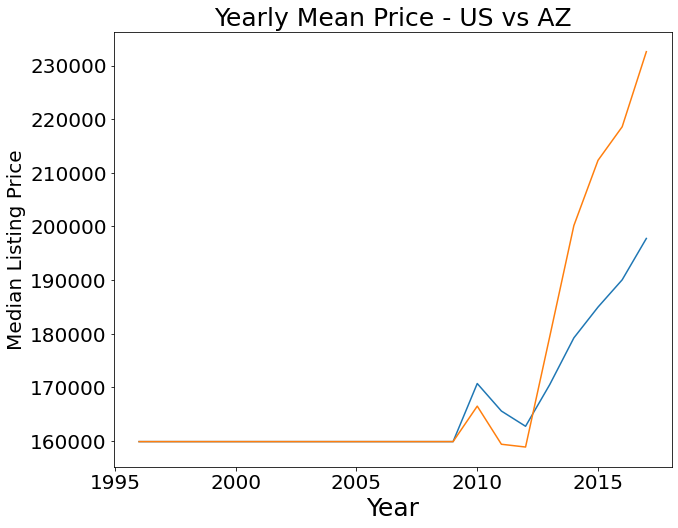

In [126]:
# Arizona has 15 counties, and data only contains information about 14. This is fine, we want to focus on
# Maricopa County, which is the metro area of Arizona.
# We will play a little with the data to view some key factors on the housing market


plt.figure(figsize=(10, 8))
yearly_median_price = complete_single_fam[['Year','MedianListingPrice_AllHomes']].groupby(['Year'])['MedianListingPrice_AllHomes'].mean()
az_yearly_price = checking_az_data[['Year','MedianListingPrice_AllHomes']].groupby(['Year'])['MedianListingPrice_AllHomes'].mean()
plt.plot(yearly_median_price)
plt.plot(az_yearly_price)
plt.tick_params(axis='both', which = 'major', labelsize = 20)
plt.xlabel('Year',fontsize = 25)
plt.ylabel('Median Listing Price',fontsize = 20)
plt.title('Yearly Mean Price - US vs AZ',fontsize = 25)




In [100]:
# It seems weird that the US median price is $160k for all years. lets take a closer look a data on column "MedianListingPrice_AllHomes"
# lets look a the individual median price per State

StateAvGPrice = complete_single_fam.groupby('StateName')['MedianListingPrice_AllHomes'].mean()

StateAvGPrice.head()


StateName
Alabama       158708.406011
Alaska        199941.517867
Arizona       171511.694360
Arkansas      149582.815787
California    212389.680836
Name: MedianListingPrice_AllHomes, dtype: float64

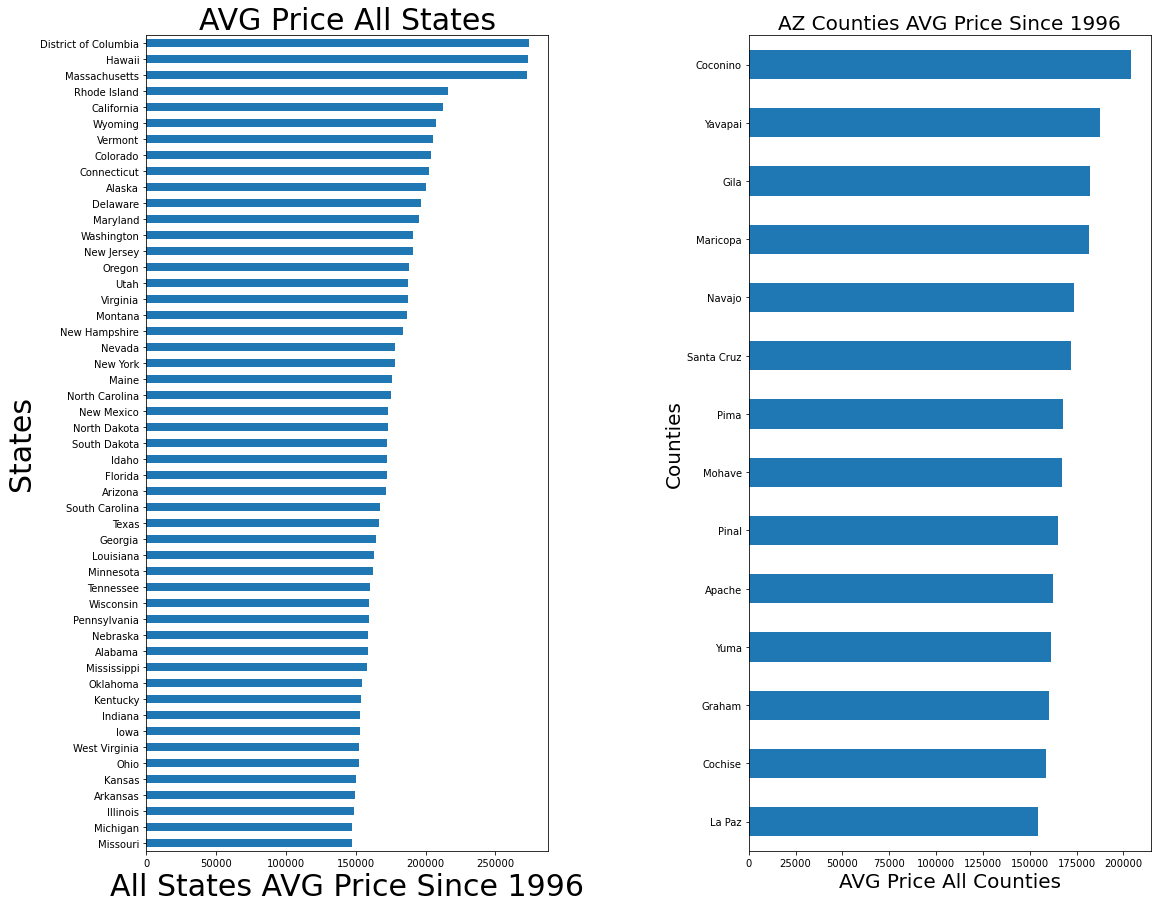

In [147]:
# We will take a look at the overall AVG price per state

fig, ax = plt.subplots(ncols=2, figsize=(18, 15))
complete_single_fam.groupby('StateName')['MedianListingPrice_AllHomes'].mean().sort_values(ascending=True).plot(kind='barh', ax=ax[0])
ax[0].set_title('AVG Price All States', fontsize=30)
ax[0].set_ylabel('States', fontsize=30)
ax[0].set_xlabel('All States AVG Price Since 1996', fontsize=30)

# We will also Include prices for each AZ county
checking_az_data.groupby('CountyName')['MedianListingPrice_AllHomes'].mean().sort_values(ascending=True).plot(kind='barh',ax=ax[1])
plt.xlabel('AVG Price All Counties', fontsize=20)
plt.ylabel('Counties', fontsize=20)
plt.title('AZ Counties AVG Price Since 1996', fontsize=20)

plt.subplots_adjust(wspace=0.5);


In [149]:
# AZ is more expensive than 22 other Stated, but cheper 28 other states
# surprisingly, Maricopa County is top 4 on house prices in the entire state.
# lets check the data summary for our dataframe

complete_single_fam.describe().T


,count,mean,std,min,25%,50%,75%,max
RegionName,518791.0,30740.207658,15197.121398,1001.000000,18087.000000,29209.000000,45075.000000,5.604500e+04
DaysOnZillow_AllHomes,518791.0,110.348291,9.865714,10.000000,110.125000,110.125000,110.125000,8.270000e+02
InventoryRaw_AllHomes,518791.0,501.532515,1101.611419,6.000000,319.000000,319.000000,319.000000,4.150200e+04
MedianListingPricePerSqft_1Bedroom,518791.0,188.920473,26.197813,42.471591,187.849166,187.849166,187.849166,1.768489e+03
MedianListingPricePerSqft_2Bedroom,518791.0,116.359156,33.870546,29.771544,114.035088,114.035088,114.035088,1.997438e+03
MedianListingPricePerSqft_3Bedroom,518791.0,104.436841,37.784121,34.370296,100.641026,100.641026,100.641026,2.397994e+03
MedianListingPricePerSqft_4Bedroom,518791.0,114.795197,35.872163,34.120240,112.187731,112.187731,112.187731,2.690328e+03
MedianListingPricePerSqft_5BedroomOrMore,518791.0,127.363510,35.543656,21.338156,125.451825,125.451825,125.451825,2.410357e+03
MedianListingPricePerSqft_AllHomes,518791.0,100.569120,41.475582,31.241061,95.209465,95.209465,95.209465,1.923529e+03
MedianListingPricePerSqft_SingleFamilyResidence,518791.0,100.034587,38.675386,31.241061,95.000000,95.000000,95.000000,2.042877e+03


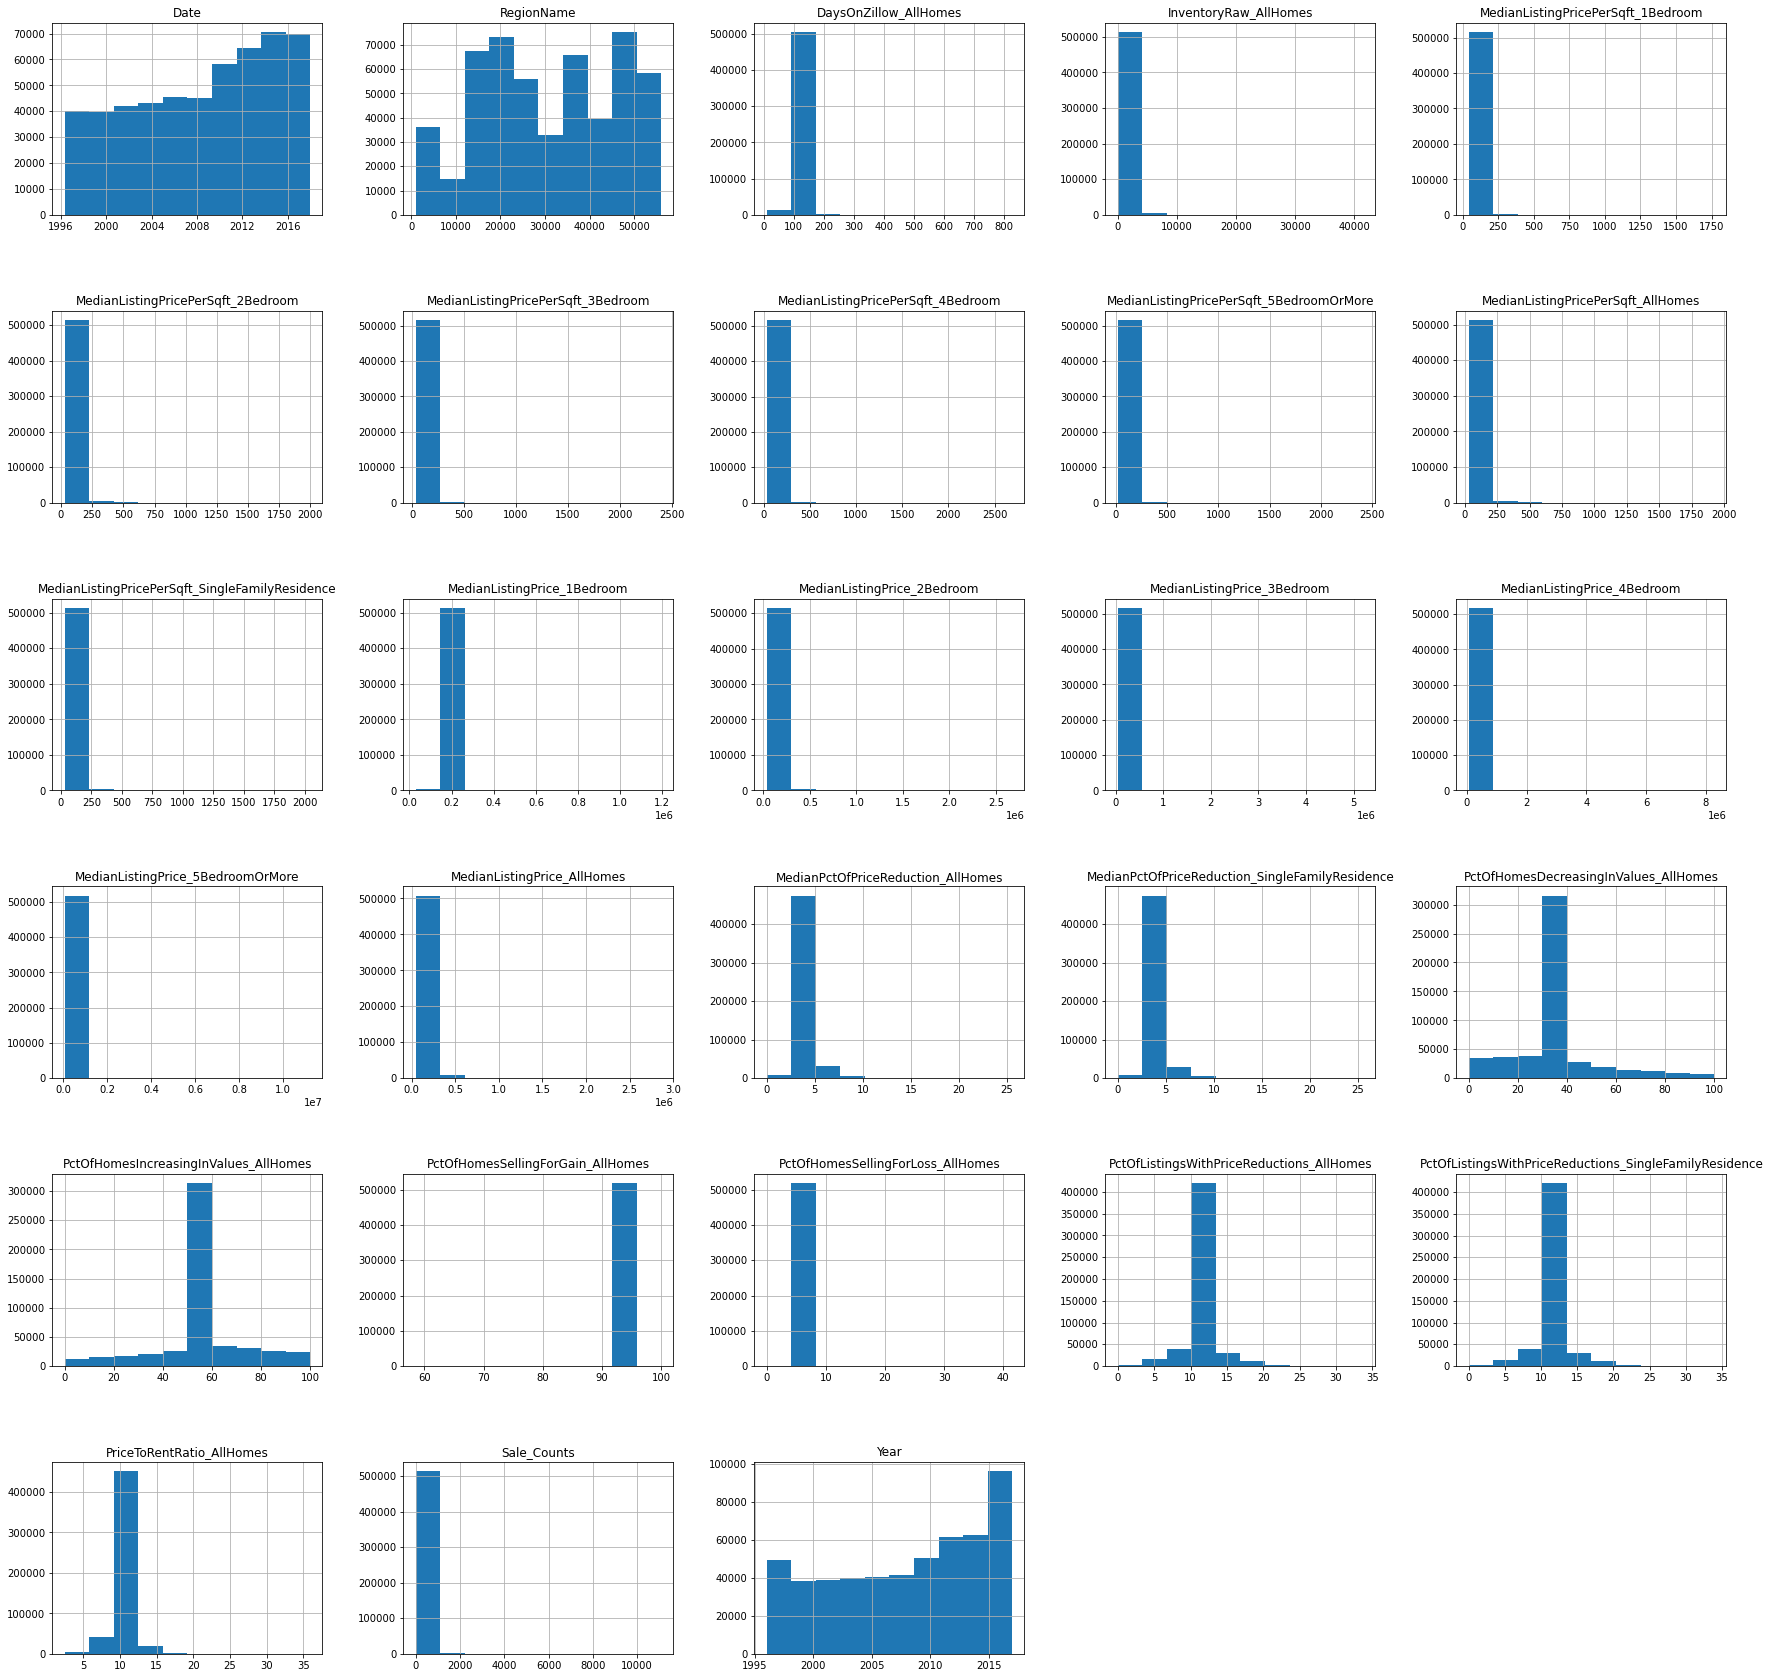

In [161]:
# Lets check the distribution of the features we have seleced

complete_single_fam.hist(figsize=(30,30))
plt.subplots_adjust(hspace=.5);